In [ ]:
import numpy as np
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model

# Predict with the model
results = model.predict('train_dataset_Синтез/bboxes/0c901a44-8916-45e0-860c-874774412596_frame_59.jpg',
                        save=True
                       )  # predict on an image

In [ ]:
reses_arms = results[0].keypoints.xy[0].cpu().numpy()

head = reses_arms[0]

left_shoulder = reses_arms[5]
right_shoulder = reses_arms[6]

left_elbow = reses_arms[7]
right_elbow = reses_arms[8]

left_wrist = reses_arms[9]
right_wrist = reses_arms[10]

left_hip = reses_arms[11]
right_hip = reses_arms[12]

left_ankle = reses_arms[15]
right_ankle = reses_arms[16]


In [ ]:
import numpy as np

def calculate_angle(vector1, vector2):

    rad = np.arccos((vector1[0]*vector2[0] + vector1[1]*vector2[1]) 
                / (np.sqrt(vector1[0]**2+vector1[1]**2) * np.sqrt(vector2[0]**2+vector2[1]**2)))

    return np.degrees(rad)

In [ ]:
# угол в локте

vector1 = left_shoulder - left_elbow
vector2 = left_wrist - left_elbow
left_angle_wrist_shoulder = calculate_angle(vector1, vector2)
print("Угол между левым плечом и кистью:", left_angle_wrist_shoulder)

vector1 = right_shoulder - right_elbow
vector2 = right_wrist - right_elbow
right_angle_wrist_shoulder = calculate_angle(vector1, vector2)
print("Угол между правым плечом и кистью:", right_angle_wrist_shoulder)

In [ ]:
# угол в плече

vector1 =  left_elbow - left_shoulder
vector2 = left_hip - left_shoulder
left_angle_elbow_hip = calculate_angle(vector1, vector2)
print("Угол между левым локтем и тазом:", left_angle_elbow_hip)

vector1 =  right_elbow - right_shoulder
vector2 = right_hip - right_shoulder
right_angle_elbow_hip = calculate_angle(vector1, vector2)
print("Угол между правым локтем и тазом:", right_angle_elbow_hip)

In [ ]:
# угол таза относительно лодыжек

vector1 =  np.asarray([left_ankle[0], left_hip[1]]) - left_ankle
vector2 = left_hip - left_ankle
left_angle_hip_ankle = calculate_angle(vector1, vector2)
print("Угол между левой лодыжка и тазом:", left_angle_hip_ankle)

vector1 =  np.asarray([right_ankle[0], right_hip[1]]) - right_ankle
vector2 = right_hip - right_ankle
right_angle_hip_ankle = calculate_angle(vector1, vector2)
print("Угол между левой лодыжка и тазом:", right_angle_hip_ankle)

In [ ]:
# угол головы

center_shoulder = (left_shoulder + right_shoulder) / 2
vector1 = head - center_shoulder
vector2 = np.asarray([center_shoulder[0], head[1]]) - center_shoulder
head_angle = calculate_angle(vector1, vector2)
print("Угол головы:", head_angle)

In [ ]:
# угол плечей относительно лодыжек

vector1 =  np.asarray([left_ankle[0], left_shoulder[1]]) - left_ankle
vector2 = left_shoulder - left_ankle
left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол плечей относительно лодыжек (лево):", left_angle_shoulder_ankle)

vector1 =  np.asarray([right_ankle[0], right_shoulder[1]]) - right_ankle
vector2 = right_shoulder - right_ankle
right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол плечей относительно лодыжек (право):", right_angle_shoulder_ankle)

In [ ]:
# угол таза относительно плечей

vector1 =  np.asarray([left_hip[0], left_shoulder[1]]) - left_hip
vector2 = left_shoulder - left_hip
left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол таза относительно плечей (лево):", left_angle_shoulder_ankle)

vector1 =  np.asarray([right_hip[0], right_shoulder[1]]) - right_hip
vector2 = right_shoulder - right_hip
right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол таза относительно плечей (право):", right_angle_shoulder_ankle)

In [ ]:
# угол между плечами и лодыжками по точке таза

vector1 =  left_shoulder - left_hip
vector2 = left_ankle - left_hip
left_angle_shoulder_hip = calculate_angle(vector1, vector2)
print("Угол между плечами и лодыжками по точке таза (лево):", left_angle_shoulder_hip)

vector1 =  right_shoulder - right_hip
vector2 = right_ankle - right_hip
right_angle_shoulder_hip = calculate_angle(vector1, vector2)
print("Угол между плечами и лодыжками по точке таза (право):", right_angle_shoulder_hip)

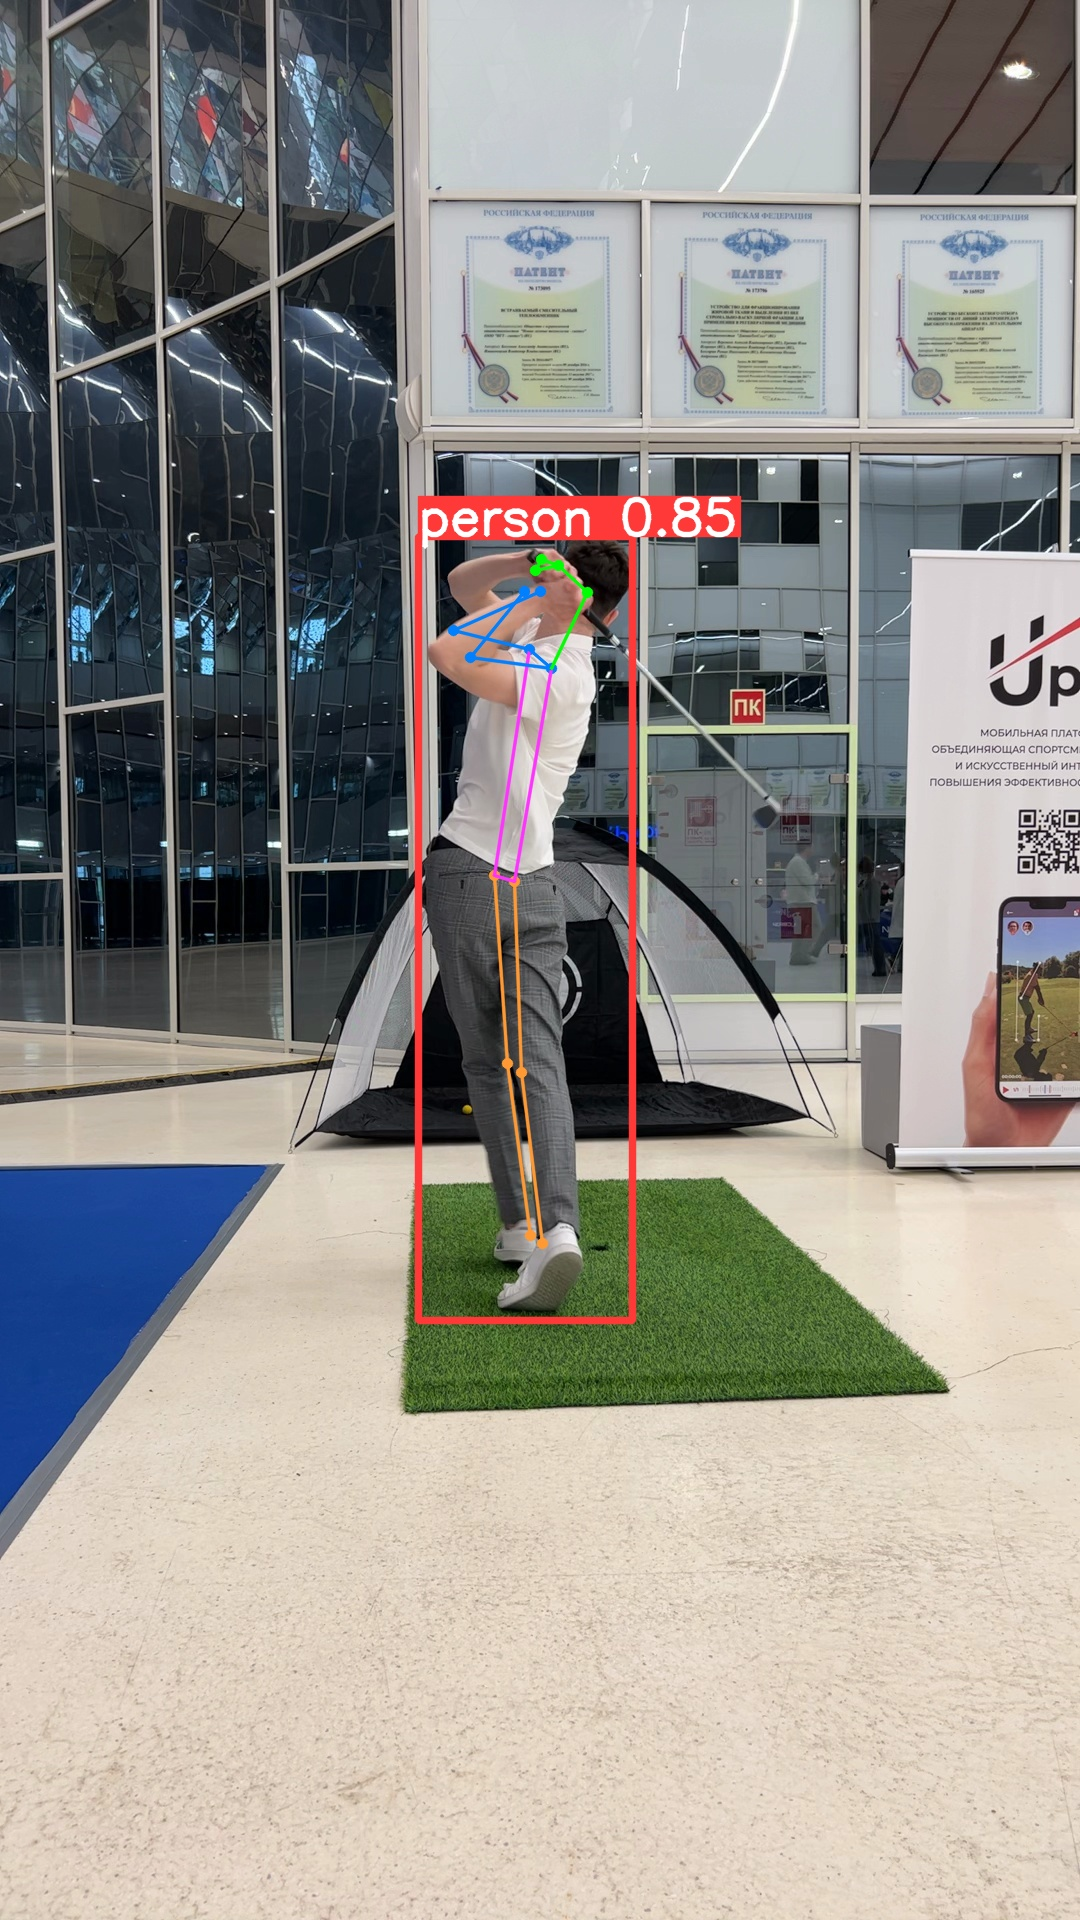

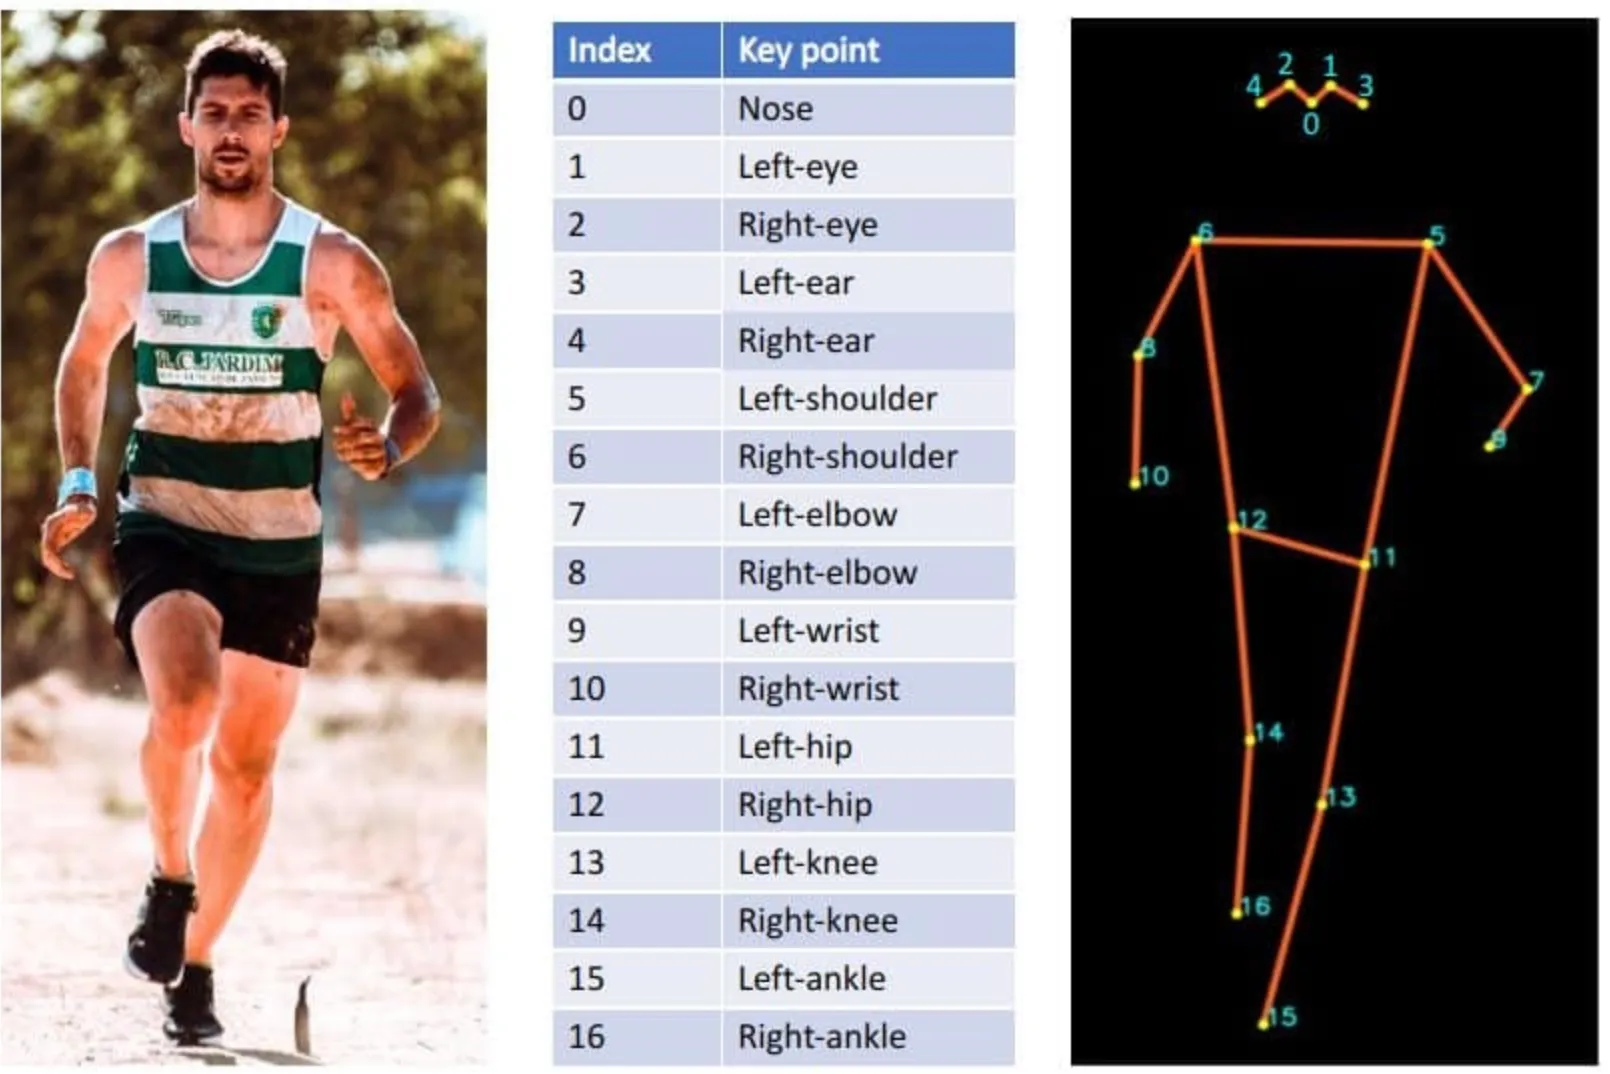

In [ ]:
results[0].keypoints

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_pickle('golfdb/golfDB.pkl')

In [ ]:
# from pytube import YouTube
# from tqdm import tqdm

# for url in tqdm(df.youtube_id):
    
#     link = f"https://www.youtube.com/watch?v={url}"
#     yt = YouTube(link)  

#     try:
#         yt.streams.filter(progressive = True, 
#                           file_extension = "mp4", 
#                           res="360p").first().download(output_path = 'vid', 
#                                                        filename=f"{url}.mp4")
#     except:
#         pass
    

In [ ]:
import cv2
import os
import pandas as pd

def extract_frames(video_path, output_folder, target_frames):

    os.makedirs(output_folder, exist_ok=True)
    
    cap = cv2.VideoCapture(video_path)

    frame_num = 0
    target_frame_num = 0
    
    while True:
        ret, frame = cap.read()
       
        if not ret:
            break

        if target_frame_num < 10 and frame_num == target_frames[target_frame_num] and target_frame_num != 5 and target_frame_num != 8:

            frame_path = f"{output_folder}/{ps[target_frame_num]}/{video_path.split('/')[-1].split('.')[0]}_{frame_num}.jpg"

            os.makedirs('/'.join(frame_path.split('/')[:-1]), exist_ok=True)
            
            cv2.imwrite(frame_path, frame)
            target_frame_num += 1
            # print(frame_num, target_frame_num)
            
        elif target_frame_num < 10 and (target_frame_num == 5 or target_frame_num == 8):
            target_frame_num += 1
        
        frame_num += 1

    cap.release()

    # print(frame_num, target_frame_num)
    

    # print(f"Кадры сохранены в папке {output_folder}")

In [ ]:
from glob import glob

vids = [x.split('/')[-1].split('.')[0] for x in glob('golfdb/vid/*mp4')]

In [ ]:
df = pd.read_pickle('golfdb/golfDB.pkl')

In [ ]:
df = df[df.youtube_id.isin(vids)].reset_index(drop=True)

In [ ]:
# df

In [ ]:
ps = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']

In [ ]:
# ps[9]

In [ ]:
from tqdm import tqdm

for i in tqdm(range(df.shape[0])):

    youtube_id = df.youtube_id.iloc[i]

    extract_frames(f'golfdb/vid/{youtube_id}.mp4', f'processed_photos', df.events.iloc[i])

    # break

In [ ]:
df = pd.read_excel('train_dataset_Синтез/positions_markup_train.xlsx')

In [ ]:
df['path'] = df['Название видео'].apply(lambda x: 'train_dataset_Синтез/positions_of_the_golf_swing_train/'+x)

In [ ]:
df['P6'] = -1
df['P9'] = -1

In [ ]:
import numpy as np

In [ ]:
df['events'] = [[x] for x in df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].values]

In [ ]:
import cv2
import os
import pandas as pd

def extract_frames(video_path, output_folder, target_frames):

    os.makedirs(output_folder, exist_ok=True)
    
    cap = cv2.VideoCapture(video_path)

    frame_num = 0
    target_frame_num = 0
    
    while True:
        ret, frame = cap.read()

        # print(frame_num, target_frame_num)
       
        if not ret:
            break

        if target_frame_num < 10 and frame_num == target_frames[target_frame_num] and target_frame_num != 5 and target_frame_num != 8:

            frame_path = f"{output_folder}/{ps[target_frame_num]}/{video_path.split('/')[-1].split('.')[0]}_{frame_num}.jpg"

            os.makedirs('/'.join(frame_path.split('/')[:-1]), exist_ok=True)
            
            cv2.imwrite(frame_path, frame)
            # print(frame_num, target_frame_num)
            target_frame_num += 1

        elif target_frame_num < 10 and target_frames[target_frame_num] == '-':
            target_frame_num += 1

        elif target_frame_num < 10 and target_frames[target_frame_num] == -1:
            target_frame_num += 1
            
        elif target_frame_num < 10 and (target_frame_num == 5 or target_frame_num == 8):
            target_frame_num += 1
            # print(target_frame_num)
        
        frame_num += 1

    # print(frame_num)

    cap.release()

    # print(f"Кадры сохранены в папке {output_folder}")

In [ ]:
df.events.iloc[-1][0][0]

In [ ]:
df.path

In [ ]:
df.events.iloc[0][0]

In [ ]:
from tqdm import tqdm

for i in tqdm(range(df.shape[0])):

    # youtube_id = df.youtube_id.iloc[i]

    extract_frames(df.path.iloc[i], f'processed_photos2', df.events.iloc[i][0])

    break

In [ ]:
df = pd.read_excel('train_dataset_Синтез/positions_markup_train.xlsx')

In [ ]:
df['path'] = df['Название видео'].apply(lambda x: 'train_dataset_Синтез/positions_of_the_golf_swing_train/'+x)

In [ ]:
df['P6'] = -1
df['P9'] = -1

In [ ]:
import numpy as np

In [ ]:
df['events'] = [[x] for x in df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']].values]

In [ ]:
import cv2
import os
import pandas as pd

def extract_frames(video_path, output_folder, target_frames):

    os.makedirs('background_pose/', exist_ok=True)
    
    cap = cv2.VideoCapture(video_path)

    frame_num = 0
    target_frame_num = 0
    
    while True:
        ret, frame = cap.read()

        # print(frame_num, target_frame_num)
       
        if not ret:
            break

        rand_n = np.random.rand()
        
        if frame_num not in target_frames and rand_n > 0.85:

            frame_path = f"background_pose/{video_path.split('/')[-1].split('.')[0]}_{frame_num}.jpg"
            
            cv2.imwrite(frame_path, frame)
            # print(frame_num, target_frame_num)
            target_frame_num += 1
        
        frame_num += 1

    # print(frame_num)

    cap.release()

    # print(f"Кадры сохранены в папке {output_folder}")

In [ ]:
df.events.iloc[-1][0][0]

In [ ]:
df.path

In [ ]:
df.events.iloc[0][0]

In [ ]:
from tqdm import tqdm

for i in tqdm(range(df.shape[0])):

    # youtube_id = df.youtube_id.iloc[i]

    extract_frames(df.path.iloc[i], f'processed_photos2', df.events.iloc[i][0])

In [ ]:
import os
from glob import glob
import shutil

In [ ]:
os.makedirs('pose_dataset', exist_ok=True)

os.makedirs('pose_dataset/train', exist_ok=True)
os.makedirs('pose_dataset/train/P1', exist_ok=True)
os.makedirs('pose_dataset/train/P2', exist_ok=True)
os.makedirs('pose_dataset/train/P3', exist_ok=True)
os.makedirs('pose_dataset/train/P4', exist_ok=True)
os.makedirs('pose_dataset/train/P5', exist_ok=True)
os.makedirs('pose_dataset/train/P7', exist_ok=True)
os.makedirs('pose_dataset/train/P8', exist_ok=True)
os.makedirs('pose_dataset/train/P10', exist_ok=True)
os.makedirs('pose_dataset/train/no', exist_ok=True)

os.makedirs('pose_dataset/val', exist_ok=True)
os.makedirs('pose_dataset/val/P1', exist_ok=True)
os.makedirs('pose_dataset/val/P2', exist_ok=True)
os.makedirs('pose_dataset/val/P3', exist_ok=True)
os.makedirs('pose_dataset/val/P4', exist_ok=True)
os.makedirs('pose_dataset/val/P5', exist_ok=True)
os.makedirs('pose_dataset/val/P7', exist_ok=True)
os.makedirs('pose_dataset/val/P8', exist_ok=True)
os.makedirs('pose_dataset/val/P10', exist_ok=True)
os.makedirs('pose_dataset/val/no', exist_ok=True)

In [ ]:
import numpy as np

for direc in ['P1', 'P2', 'P3', 'P4', 'P5', 'P7', 'P8', 'P10', 'no']:

    for file_path in glob(f'processed_photos/{direc}/*'):
    
        rand_v = np.random.rand()
    
        if rand_v > 0.85:
            shutil.copyfile(file_path, f'pose_dataset/val/{direc}/'+file_path.split('/')[-1])
    
        else:
            shutil.copyfile(file_path, f'pose_dataset/train/{direc}/'+file_path.split('/')[-1])

# inf

In [16]:
import cv2
from PIL import Image
from ultralytics import YOLO

model_ball = YOLO('app/models/ball_detect.pt')
model_phase = YOLO('app/models/phase_classify.pt')
model_pose = YOLO('app/models/yolov8n-pose.pt')

In [ ]:
cap = cv2.VideoCapture('train_dataset_Синтез/positions_of_the_golf_swing_train/04a00268-82fe-4342-9ab1-a3291440b55f.mp4')

In [25]:
def process_video1(cap):

    preds = []
    frame_num = 0
    
    while True:
        ret, frame = cap.read()
       
        if not ret:
            break
        
        pred = model_phase.predict(frame, device='mps')[0].probs.data.cpu().numpy()
        preds.append(pred)
        
        frame_num += 1
        # break
    
    cap.release()

    preds = np.asarray(preds)

    p1_n = np.where(preds[:, 0] == preds[:, 0].max())[0][0]
    p2_n = np.where(preds[:, 1] == preds[:, 1].max())[0][0]
    p3_n = np.where(preds[:, 2] == preds[:, 2].max())[0][0]
    p4_n = np.where(preds[:, 3] == preds[:, 3].max())[0][0]
    p5_n = np.where(preds[:, 4] == preds[:, 4].max())[0][0]
    p7_n = np.where(preds[:, 5] == preds[:, 5].max())[0][0]
    p8_n = np.where(preds[:, 6] == preds[:, 6].max())[0][0]
    p10_n = np.where(preds[:, 7] == preds[:, 7].max())[0][0]

    pred_frames = [p1_n, p2_n, p3_n, p4_n, p5_n, p7_n, p8_n, p10_n]
    
    return pred_frames

def process_video2(cap, pred_frames, path_to_save='temp_images'):
    
    p1_frame = 0
    p2_frame = 0
    p3_frame = 0
    p4_frame = 0
    p5_frame = 0
    p7_frame = 0
    p8_frame = 0
    p10_frame = 0
    
    frame_num = 0
    
    while True:
        ret, frame_ = cap.read()
       
        if not ret:
            break
    
        frame = cv2.cvtColor(frame_, cv2.COLOR_BGR2RGB)
    
        if frame_num == pred_frames[0]:
            p1_frame = frame.copy()
            Image.fromarray(p1_frame).save(f'{path_to_save}/p1_frame.jpg')
    
        if frame_num == pred_frames[1]:
            p2_frame = frame.copy()
            Image.fromarray(p2_frame).save(f'{path_to_save}/p2_frame.jpg')
    
        if frame_num == pred_frames[2]:
            p3_frame = frame.copy()
            Image.fromarray(p3_frame).save(f'{path_to_save}/p3_frame.jpg')
    
        if frame_num == pred_frames[3]:
            p4_frame = frame.copy()
            Image.fromarray(p4_frame).save(f'{path_to_save}/p4_frame.jpg')
    
        if frame_num == pred_frames[4]:
            p5_frame = frame.copy()
            Image.fromarray(p5_frame).save(f'{path_to_save}/p5_frame.jpg')
    
        if frame_num == pred_frames[5]:
            p7_frame = frame.copy()
            Image.fromarray(p7_frame).save(f'{path_to_save}/p7_frame.jpg')
    
        if frame_num == pred_frames[6]:
            p8_frame = frame.copy()
            Image.fromarray(p8_frame).save(f'{path_to_save}/p8_frame.jpg')
            
        if frame_num == pred_frames[7]:
            p10_frame = frame.copy()
            Image.fromarray(p10_frame).save(f'{path_to_save}/p10_frame.jpg')
        
        frame_num += 1
        # break
    
    cap.release()

def process_video3(frame):

    res_pose = model_pose.predict(frame, max_det=1)

    reses_arms = res_pose[0].keypoints.xy[0].cpu().numpy()

    head = reses_arms[0]
    
    left_shoulder = reses_arms[5]
    right_shoulder = reses_arms[6]
    
    left_elbow = reses_arms[7]
    right_elbow = reses_arms[8]
    
    left_wrist = reses_arms[9]
    right_wrist = reses_arms[10]
    
    left_hip = reses_arms[11]
    right_hip = reses_arms[12]
    
    left_ankle = reses_arms[15]
    right_ankle = reses_arms[16]


    # угол в локте
    vector1 = left_shoulder - left_elbow
    vector2 = left_wrist - left_elbow
    left_angle_wrist_shoulder = calculate_angle(vector1, vector2)
    print("Угол между левым плечом и кистью:", left_angle_wrist_shoulder)
    
    vector1 = right_shoulder - right_elbow
    vector2 = right_wrist - right_elbow
    right_angle_wrist_shoulder = calculate_angle(vector1, vector2)
    print("Угол между правым плечом и кистью:", right_angle_wrist_shoulder)
    
    # угол в плече
    vector1 =  left_elbow - left_shoulder
    vector2 = left_hip - left_shoulder
    left_angle_elbow_hip = calculate_angle(vector1, vector2)
    print("Угол между левым локтем и тазом:", left_angle_elbow_hip)
    
    vector1 =  right_elbow - right_shoulder
    vector2 = right_hip - right_shoulder
    right_angle_elbow_hip = calculate_angle(vector1, vector2)
    print("Угол между правым локтем и тазом:", right_angle_elbow_hip)
    
    # угол таза относительно лодыжек
    vector1 =  np.asarray([left_ankle[0], left_hip[1]]) - left_ankle
    vector2 = left_hip - left_ankle
    left_angle_hip_ankle = calculate_angle(vector1, vector2)
    print("Угол между левой лодыжка и тазом:", left_angle_hip_ankle)
    
    vector1 =  np.asarray([right_ankle[0], right_hip[1]]) - right_ankle
    vector2 = right_hip - right_ankle
    right_angle_hip_ankle = calculate_angle(vector1, vector2)
    print("Угол между левой лодыжка и тазом:", right_angle_hip_ankle)
    
    # угол головы
    center_shoulder = (left_shoulder + right_shoulder) / 2
    vector1 = head - center_shoulder
    vector2 = np.asarray([center_shoulder[0], head[1]]) - center_shoulder
    head_angle = calculate_angle(vector1, vector2)
    print("Угол головы:", head_angle)
    
    # угол плечей относительно лодыжек
    vector1 =  np.asarray([left_ankle[0], left_shoulder[1]]) - left_ankle
    vector2 = left_shoulder - left_ankle
    left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
    print("Угол плечей относительно лодыжек (лево):", left_angle_shoulder_ankle)
    
    vector1 =  np.asarray([right_ankle[0], right_shoulder[1]]) - right_ankle
    vector2 = right_shoulder - right_ankle
    right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
    print("Угол плечей относительно лодыжек (право):", right_angle_shoulder_ankle)
    
    # угол таза относительно плечей
    vector1 =  np.asarray([left_hip[0], left_shoulder[1]]) - left_hip
    vector2 = left_shoulder - left_hip
    left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
    print("Угол таза относительно плечей (лево):", left_angle_shoulder_ankle)
    
    vector1 =  np.asarray([right_hip[0], right_shoulder[1]]) - right_hip
    vector2 = right_shoulder - right_hip
    right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
    print("Угол таза относительно плечей (право):", right_angle_shoulder_ankle)
    
    # угол между плечами и лодыжками по точке таза
    vector1 =  left_shoulder - left_hip
    vector2 = left_ankle - left_hip
    left_angle_shoulder_hip = calculate_angle(vector1, vector2)
    print("Угол между плечами и лодыжками по точке таза (лево):", left_angle_shoulder_hip)
    
    vector1 =  right_shoulder - right_hip
    vector2 = right_ankle - right_hip
    right_angle_shoulder_hip = calculate_angle(vector1, vector2)
    print("Угол между плечами и лодыжками по точке таза (право):", right_angle_shoulder_hip)

    return left_angle_wrist_shoulder, right_angle_wrist_shoulder, left_angle_elbow_hip, right_angle_elbow_hip, head_angle

def process_video4(file, path_to_save='temp_images'):
    
    res_ball = model_ball.track(file, conf=0.01, max_det=1)
    
    res_ball_frames = [cv2.cvtColor(res_ball[i].plot(), cv2.COLOR_BGR2RGB) for i in range(len(res_ball)) if res_ball[i].boxes.is_track]
    
    res_ball_boxes = [res_ball[i].boxes.data.cpu().numpy() for i in range(len(res_ball)) if res_ball[i].boxes.is_track]
    
    res_ball_boxes = [x[0] for x in res_ball_boxes]
    
    start_balls_image = res_ball_frames[0]
    
    for i in range(1, len(res_ball_frames)):
    
        x1 = int(res_ball_boxes[i][0])
        x2 = int(res_ball_boxes[i][2])
        
        y1 = int(res_ball_boxes[i][1])
        y2 = int(res_ball_boxes[i][3])
    
        start_balls_image[y1:y2, x1:x2, :] = res_ball_frames[i][y1:y2, x1:x2, :]
    
    
    Image.fromarray(start_balls_image).save(f'{path_to_save}/ball.jpg')


In [27]:
import numpy as np

def calculate_angle(vector1, vector2):

    rad = np.arccos((vector1[0]*vector2[0] + vector1[1]*vector2[1]) 
                / (np.sqrt(vector1[0]**2+vector1[1]**2) * np.sqrt(vector2[0]**2+vector2[1]**2)))

    return np.degrees(rad)

In [28]:
#cap = cv2.VideoCapture('test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4')
#pred_frames = process_video1(cap)
#
#cap = cv2.VideoCapture('test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4')
#process_video2(cap, pred_frames, 'temp_images')

left_angle_wrist_shoulder, right_angle_wrist_shoulder, \
    left_angle_elbow_hip, right_angle_elbow_hip, head_angle = process_video3('temp_images/p5_frame.jpg')

# process_video4('test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4', path_to_save='temp_images')


image 1/1 /Volumes/ADATA/golf/temp_images/p5_frame.jpg: 640x384 1 person, 159.3ms
Speed: 2.5ms preprocess, 159.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


Угол между левым плечом и кистью: 6.429726156996271
Угол между правым плечом и кистью: 79.85697306212889
Угол между левым локтем и тазом: 60.120819836826385
Угол между правым локтем и тазом: 124.71559293235151
Угол между левой лодыжка и тазом: 4.111920779241111
Угол между левой лодыжка и тазом: 4.4275117279246645
Угол головы: 79.72172452465826
Угол плечей относительно лодыжек (лево): 10.15134756271857
Угол плечей относительно лодыжек (право): 5.617944947005298
Угол таза относительно плечей (лево): 29.351781926171906
Угол таза относительно плечей (право): 20.33128301520782
Угол между плечами и лодыжками по точке таза (лево): 146.53629809498563
Угол между плечами и лодыжками по точке таза (право): 155.24119036363672




    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/635) /Volumes/ADATA/golf/test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4: 640x384 1 golfball, 222.9ms
video 1/1 (2/635) /Volumes/ADATA/golf/test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4: 640x384 1 golfball, 148.4ms
video 1/1 (3/635) /Volumes/ADATA/golf/test_dataset_синтез/Тест/5badc618-782b-43f2-86e6-365279981524.mp4: 640x384 1 golfball, 137.9ms
video 1/1 (4/635) /Volumes/ADATA/golf/test_dataset_синтез/Те

In [29]:
left_angle_wrist_shoulder, right_angle_wrist_shoulder, left_angle_elbow_hip, right_angle_elbow_hip, head_angle

(6.429726156996271,
 79.85697306212889,
 60.120819836826385,
 124.71559293235151,
 79.72172452465826)

In [30]:
model_pose.predict('temp_images/p5_frame.jpg', save=True)


image 1/1 /Volumes/ADATA/golf/temp_images/p5_frame.jpg: 640x384 1 person, 167.5ms
Speed: 3.4ms preprocess, 167.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/pose/predict7


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 keys: ['boxes', 'keypoints']
 masks: None
 names: {0: 'person'}
 orig_img: array([[[ 69,  60,  50],
         [ 69,  60,  50],
         [ 70,  61,  51],
         ...,
         [ 64,  72,  85],
         [ 64,  72,  85],
         [ 64,  72,  85]],
 
        [[ 71,  62,  52],
         [ 71,  62,  52],
         [ 71,  62,  52],
         ...,
         [ 64,  72,  85],
         [ 64,  72,  85],
         [ 64,  72,  85]],
 
        [[ 73,  64,  54],
         [ 73,  64,  54],
         [ 73,  64,  54],
         ...,
         [ 63,  71,  84],
         [ 63,  71,  84],
         [ 63,  71,  84]],
 
        ...,
 
        [[197, 215, 226],
         [197, 215, 226],
         [197, 215, 226],
         ...,
         [190, 208, 219],
         [191, 209, 220],
         [191, 209, 220]],
 
        [[197, 215, 226],
         [197, 215, 226],


In [31]:
cap = cv2.VideoCapture('Best Xander Schauffele Golf Swing Video 🔥.mp4')
pred_frames = process_video1(cap)

cap = cv2.VideoCapture('Best Xander Schauffele Golf Swing Video 🔥.mp4')
process_video2(cap, pred_frames, 'etalon_images')

left_angle_wrist_shoulder, right_angle_wrist_shoulder, \
    left_angle_elbow_hip, right_angle_elbow_hip, head_angle = process_video3('etalon_images/p5_frame.jpg')

#process_video4('Best Xander Schauffele Golf Swing Video 🔥.mp4', path_to_save='etalon_images')


0: 640x640 no 0.99, P2 0.01, P3 0.00, P4 0.00, P1 0.00, 32.3ms
Speed: 9.6ms preprocess, 32.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 no 0.98, P2 0.02, P3 0.00, P1 0.00, P4 0.00, 15.3ms
Speed: 4.5ms preprocess, 15.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 no 0.50, P2 0.49, P1 0.00, P3 0.00, P4 0.00, 17.0ms
Speed: 6.0ms preprocess, 17.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 P2 0.76, no 0.24, P1 0.00, P3 0.00, P4 0.00, 24.1ms
Speed: 5.1ms preprocess, 24.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 no 0.91, P2 0.09, P1 0.00, P3 0.00, P4 0.00, 28.7ms
Speed: 8.1ms preprocess, 28.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 no 0.90, P2 0.10, P1 0.00, P3 0.00, P4 0.00, 31.1ms
Speed: 14.4ms preprocess, 31.1ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 no 0.84, P2 0.15, P1 

Угол между левым плечом и кистью: 85.31524013189019
Угол между правым плечом и кистью: 36.469389248578544
Угол между левым локтем и тазом: 3.77348356516988
Угол между правым локтем и тазом: 63.161343676374
Угол между левой лодыжка и тазом: 5.204892968912114
Угол между левой лодыжка и тазом: 1.088877797139423
Угол головы: 76.02216579147527
Угол плечей относительно лодыжек (лево): 15.065671491450578
Угол плечей относительно лодыжек (право): 6.996121776542924
Угол таза относительно плечей (лево): 31.240254616959884
Угол таза относительно плечей (право): 21.233860281894202
Угол между плечами и лодыжками по точке таза (лево): 153.9646391211322
Угол между плечами и лодыжками по точке таза (право): 157.67736047707265


In [32]:
left_angle_wrist_shoulder, right_angle_wrist_shoulder, left_angle_elbow_hip, right_angle_elbow_hip, head_angle

(85.31524013189019,
 36.469389248578544,
 3.77348356516988,
 63.161343676374,
 76.02216579147527)

In [33]:
model_pose.predict('etalon_images/p5_frame.jpg', save=True)


image 1/1 /Volumes/ADATA/golf/etalon_images/p5_frame.jpg: 640x384 1 person, 290.6ms
Speed: 1.4ms preprocess, 290.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/pose/predict7


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 keys: ['boxes', 'keypoints']
 masks: None
 names: {0: 'person'}
 orig_img: array([[[204, 157, 135],
         [204, 157, 135],
         [204, 157, 135],
         ...,
         [201, 160, 138],
         [201, 160, 138],
         [201, 160, 138]],
 
        [[204, 157, 135],
         [204, 157, 135],
         [204, 157, 135],
         ...,
         [201, 160, 138],
         [201, 160, 138],
         [201, 160, 138]],
 
        [[204, 157, 135],
         [204, 157, 135],
         [204, 157, 135],
         ...,
         [201, 160, 138],
         [201, 160, 138],
         [201, 160, 138]],
 
        ...,
 
        [[ 40, 102,  80],
         [ 41, 103,  81],
         [ 46, 108,  86],
         ...,
         [ 79, 139, 115],
         [ 74, 134, 110],
         [ 69, 129, 105]],
 
        [[ 39, 101,  79],
         [ 39, 101,  79],


In [ ]:
res_ball = model_ball.track('train_dataset_Синтез/positions_of_the_golf_swing_train/09e5fd86-2cb1-4005-bfb4-1692a9160d7c.mp4', conf=0.01, max_det=1)

res_ball_frames = [cv2.cvtColor(res_ball[i].plot(), cv2.COLOR_BGR2RGB) for i in range(len(res_ball)) if res_ball[i].boxes.is_track]

res_ball_boxes = [res_ball[i].boxes.data.cpu().numpy() for i in range(len(res_ball)) if res_ball[i].boxes.is_track]

res_ball_boxes = [x[0] for x in res_ball_boxes]

start_balls_image = res_ball_frames[0]

for i in range(1, len(res_ball_frames)):

    x1 = int(res_ball_boxes[i][0])
    x2 = int(res_ball_boxes[i][2])
    
    y1 = int(res_ball_boxes[i][1])
    y2 = int(res_ball_boxes[i][3])

    start_balls_image[y1:y2, x1:x2, :] = res_ball_frames[i][y1:y2, x1:x2, :]


Image.fromarray(start_balls_image).save('temps/ball.jpg')

In [ ]:
cap = cv2.VideoCapture('train_dataset_Синтез/positions_of_the_golf_swing_train/04a00268-82fe-4342-9ab1-a3291440b55f.mp4')
# cap = cv2.VideoCapture('train_dataset_Синтез/positions_of_the_golf_swing_train/4ea3cf67-92b9-465b-a11f-1baf8005d3c4.mp4')

preds = []
frame_num = 0

while True:
    ret, frame = cap.read()
   
    if not ret:
        break
    
    pred = model_phase.predict(frame, device='mps')[0].probs.data.cpu().numpy()
    preds.append(pred)
    
    frame_num += 1
    # break

cap.release()


In [ ]:
preds = np.asarray(preds)

In [ ]:
p1_n = np.where(preds[:, 0] == preds[:, 0].max())[0][0]
p2_n = np.where(preds[:, 1] == preds[:, 1].max())[0][0]
p3_n = np.where(preds[:, 2] == preds[:, 2].max())[0][0]
p4_n = np.where(preds[:, 3] == preds[:, 3].max())[0][0]
p5_n = np.where(preds[:, 4] == preds[:, 4].max())[0][0]
p7_n = np.where(preds[:, 5] == preds[:, 5].max())[0][0]
p8_n = np.where(preds[:, 6] == preds[:, 6].max())[0][0]
p10_n = np.where(preds[:, 7] == preds[:, 7].max())[0][0]

In [ ]:
p2_n, p4_n

In [ ]:
if p2_n >= p3_n or p2_n <= p1_n:
    p2_n = p1_n + np.where(preds[p1_n:p3_n, 1] == preds[p1_n:p3_n, 1].max())[0][0]

if p3_n >= p4_n or p3_n <= p2_n:
    p3_n = p2_n + np.where(preds[p2_n:p4_n, 1] == preds[p2_n:p4_n, 1].max())[0][0]

if p4_n >= p5_n or p4_n <= p3_n:
    p4_n = p3_n + np.where(preds[p3_n:p5_n, 1] == preds[p3_n:p5_n, 1].max())[0][0]

if p5_n >= p7_n or p5_n <= p4_n:
    p5_n = p4_n + np.where(preds[p4_n:p7_n, 1] == preds[p4_n:p7_n, 1].max())[0][0]

if p7_n >= p8_n or p7_n <= p5_n:
    p7_n = p5_n + np.where(preds[p5_n:p8_n, 1] == preds[p5_n:p8_n, 1].max())[0][0]

if p8_n >= p10_n or p8_n <= p7_n:
    p8_n = p7_n + np.where(preds[p7_n:p10_n, 1] == preds[p7_n:p10_n, 1].max())[0][0]

In [ ]:
pred_frames = [p1_n, p2_n, p3_n, p4_n, p5_n, p7_n, p8_n, p10_n]

In [ ]:
pred_frames

In [ ]:
cap = cv2.VideoCapture('train_dataset_Синтез/positions_of_the_golf_swing_train/04a00268-82fe-4342-9ab1-a3291440b55f.mp4')
# cap = cv2.VideoCapture('train_dataset_Синтез/positions_of_the_golf_swing_train/4ea3cf67-92b9-465b-a11f-1baf8005d3c4.mp4')

p1_frame = 0
p2_frame = 0
p3_frame = 0
p4_frame = 0
p5_frame = 0
p7_frame = 0
p8_frame = 0
p10_frame = 0

frame_num = 0

while True:
    ret, frame_ = cap.read()
   
    if not ret:
        break

    frame = cv2.cvtColor(frame_, cv2.COLOR_BGR2RGB)

    if frame_num == pred_frames[0]:
        p1_frame = frame.copy()

    if frame_num == pred_frames[1]:
        p2_frame = frame.copy()

    if frame_num == pred_frames[2]:
        p3_frame = frame.copy()

    if frame_num == pred_frames[3]:
        p4_frame = frame.copy()

    if frame_num == pred_frames[4]:
        p5_frame = frame.copy()

    if frame_num == pred_frames[5]:
        p7_frame = frame.copy()

    if frame_num == pred_frames[6]:
        p8_frame = frame.copy()
        
    if frame_num == pred_frames[7]:
        p10_frame = frame.copy()
    
    frame_num += 1
    # break

cap.release()


In [ ]:
res_pose = model_pose.predict(p3_frame, max_det=1)

In [ ]:
reses_arms = res_pose[0].keypoints.xy[0].cpu().numpy()

head = reses_arms[0]

left_shoulder = reses_arms[5]
right_shoulder = reses_arms[6]

left_elbow = reses_arms[7]
right_elbow = reses_arms[8]

left_wrist = reses_arms[9]
right_wrist = reses_arms[10]

left_hip = reses_arms[11]
right_hip = reses_arms[12]

left_ankle = reses_arms[15]
right_ankle = reses_arms[16]


In [ ]:
res_pose[0].boxes.conf

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(res_pose[0].plot())

In [ ]:
reses_arms = res_pose[0].keypoints.xy[0].cpu().numpy()

head = reses_arms[0]

left_shoulder = reses_arms[5]
right_shoulder = reses_arms[6]

left_elbow = reses_arms[7]
right_elbow = reses_arms[8]

left_wrist = reses_arms[9]
right_wrist = reses_arms[10]

left_hip = reses_arms[11]
right_hip = reses_arms[12]

left_ankle = reses_arms[15]
right_ankle = reses_arms[16]


In [ ]:
import numpy as np

def calculate_angle(vector1, vector2):

    rad = np.arccos((vector1[0]*vector2[0] + vector1[1]*vector2[1]) 
                / (np.sqrt(vector1[0]**2+vector1[1]**2) * np.sqrt(vector2[0]**2+vector2[1]**2)))

    return np.degrees(rad)

In [ ]:
# угол в локте
vector1 = left_shoulder - left_elbow
vector2 = left_wrist - left_elbow
left_angle_wrist_shoulder = calculate_angle(vector1, vector2)
print("Угол между левым плечом и кистью:", left_angle_wrist_shoulder)

vector1 = right_shoulder - right_elbow
vector2 = right_wrist - right_elbow
right_angle_wrist_shoulder = calculate_angle(vector1, vector2)
print("Угол между правым плечом и кистью:", right_angle_wrist_shoulder)

# угол в плече
vector1 =  left_elbow - left_shoulder
vector2 = left_hip - left_shoulder
left_angle_elbow_hip = calculate_angle(vector1, vector2)
print("Угол между левым локтем и тазом:", left_angle_elbow_hip)

vector1 =  right_elbow - right_shoulder
vector2 = right_hip - right_shoulder
right_angle_elbow_hip = calculate_angle(vector1, vector2)
print("Угол между правым локтем и тазом:", right_angle_elbow_hip)

# угол таза относительно лодыжек
vector1 =  np.asarray([left_ankle[0], left_hip[1]]) - left_ankle
vector2 = left_hip - left_ankle
left_angle_hip_ankle = calculate_angle(vector1, vector2)
print("Угол между левой лодыжка и тазом:", left_angle_hip_ankle)

vector1 =  np.asarray([right_ankle[0], right_hip[1]]) - right_ankle
vector2 = right_hip - right_ankle
right_angle_hip_ankle = calculate_angle(vector1, vector2)
print("Угол между левой лодыжка и тазом:", right_angle_hip_ankle)

# угол головы
center_shoulder = (left_shoulder + right_shoulder) / 2
vector1 = head - center_shoulder
vector2 = np.asarray([center_shoulder[0], head[1]]) - center_shoulder
head_angle = calculate_angle(vector1, vector2)
print("Угол головы:", head_angle)

# угол плечей относительно лодыжек
vector1 =  np.asarray([left_ankle[0], left_shoulder[1]]) - left_ankle
vector2 = left_shoulder - left_ankle
left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол плечей относительно лодыжек (лево):", left_angle_shoulder_ankle)

vector1 =  np.asarray([right_ankle[0], right_shoulder[1]]) - right_ankle
vector2 = right_shoulder - right_ankle
right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол плечей относительно лодыжек (право):", right_angle_shoulder_ankle)

# угол таза относительно плечей
vector1 =  np.asarray([left_hip[0], left_shoulder[1]]) - left_hip
vector2 = left_shoulder - left_hip
left_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол таза относительно плечей (лево):", left_angle_shoulder_ankle)

vector1 =  np.asarray([right_hip[0], right_shoulder[1]]) - right_hip
vector2 = right_shoulder - right_hip
right_angle_shoulder_ankle = calculate_angle(vector1, vector2)
print("Угол таза относительно плечей (право):", right_angle_shoulder_ankle)

# угол между плечами и лодыжками по точке таза
vector1 =  left_shoulder - left_hip
vector2 = left_ankle - left_hip
left_angle_shoulder_hip = calculate_angle(vector1, vector2)
print("Угол между плечами и лодыжками по точке таза (лево):", left_angle_shoulder_hip)

vector1 =  right_shoulder - right_hip
vector2 = right_ankle - right_hip
right_angle_shoulder_hip = calculate_angle(vector1, vector2)
print("Угол между плечами и лодыжками по точке таза (право):", right_angle_shoulder_hip)

In [ ]:
res_ball = model_ball.track('train_dataset_Синтез/positions_of_the_golf_swing_train/09e5fd86-2cb1-4005-bfb4-1692a9160d7c.mp4', conf=0.01, max_det=1)

res_ball_frames = [cv2.cvtColor(res_ball[i].plot(), cv2.COLOR_BGR2RGB) for i in range(len(res_ball)) if res_ball[i].boxes.is_track]

res_ball_boxes = [res_ball[i].boxes.data.cpu().numpy() for i in range(len(res_ball)) if res_ball[i].boxes.is_track]

res_ball_boxes = [x[0] for x in res_ball_boxes]

start_balls_image = res_ball_frames[0]

for i in range(1, len(res_ball_frames)):

    x1 = int(res_ball_boxes[i][0])
    x2 = int(res_ball_boxes[i][2])
    
    y1 = int(res_ball_boxes[i][1])
    y2 = int(res_ball_boxes[i][3])

    start_balls_image[y1:y2, x1:x2, :] = res_ball_frames[i][y1:y2, x1:x2, :]


Image.fromarray(start_balls_image).save('temps/ball.jpg')

In [ ]:
# res_ball_frames = [cv2.cvtColor(res_ball[i].plot(), cv2.COLOR_BGR2RGB) for i in range(len(res_ball)) if res_ball[i].boxes.data.shape[0] > 0]

# res_ball_boxes = [res_ball[i].boxes.data.cpu().numpy() for i in range(len(res_ball)) if res_ball[i].boxes.data.shape[0] > 0]

# res_ball_boxes = [x[0] for x in res_ball_boxes]

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(start_balls_image)

In [ ]:
res_ball_ = [x[0] for x in res_ball_ if x.shape[0] > 0]

In [ ]:
# res_ball_ = [res_ball_[i] for i in range(len(res_ball_)) if i%5 == 0]

In [ ]:
res_ball_

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(res_pose[0].plot())

# test inf

In [1]:
import cv2
from ultralytics import YOLO

model_ball = YOLO('app/models/ball_detect.pt')
model_phase = YOLO('app/models/phase_classify.pt')
model_pose = YOLO('app/models/yolov8n-pose.pt')

In [10]:
from glob import glob
import pandas as pd
import numpy as np

In [11]:
sub = pd.read_csv('test_dataset_синтез/submission.csv', sep=';')

In [12]:
from tqdm import tqdm

pred_frames = []

for path in tqdm(sub['Название видео']):

    path = f'test_dataset_синтез/Тест/{path}'

    cap = cv2.VideoCapture(path)
    
    preds = []
    frame_num = 0
    
    while True:
        ret, frame = cap.read()
       
        if not ret:
            break
        
        pred = model_phase.predict(frame, device='mps', verbose=False)[0].probs.data.cpu().numpy()
        preds.append(pred)
        
        frame_num += 1
        # break
    
    cap.release()

    preds = np.asarray(preds)

    p1_n = np.where(preds[:, 0] == preds[:, 0].max())[0][0]
    p2_n = np.where(preds[:, 1] == preds[:, 1].max())[0][0]
    p3_n = np.where(preds[:, 2] == preds[:, 2].max())[0][0]
    p4_n = np.where(preds[:, 3] == preds[:, 3].max())[0][0]
    p5_n = np.where(preds[:, 4] == preds[:, 4].max())[0][0]
    p7_n = np.where(preds[:, 5] == preds[:, 5].max())[0][0]
    p8_n = np.where(preds[:, 6] == preds[:, 6].max())[0][0]
    p10_n = np.where(preds[:, 7] == preds[:, 7].max())[0][0]

#    if p2_n <= p1_n:
#        p2_n = p1_n + np.where(preds[p1_n:, 1] == preds[p1_n:, 1].max())[0][0]
#    if p3_n <= p2_n:
#        p3_n = p2_n + np.where(preds[p2_n:, 2] == preds[p2_n:, 2].max())[0][0]
#    if p4_n <= p3_n:
#        p4_n = p3_n + np.where(preds[p3_n:, 3] == preds[p3_n:, 3].max())[0][0]
#    if p5_n <= p4_n:
#        p5_n = p4_n + np.where(preds[p4_n:, 4] == preds[p4_n:, 4].max())[0][0]
#    if p7_n <= p5_n:
#        p7_n = p5_n + np.where(preds[p5_n:, 5] == preds[p5_n:, 5].max())[0][0]
#    if p8_n <= p7_n:
#        p8_n = p7_n + np.where(preds[p7_n:, 6] == preds[p7_n:, 6].max())[0][0]
#    if p10_n <= p8_n:
#        p10_n = p8_n + np.where(preds[p8_n:, 7] == preds[p8_n:, 7].max())[0][0]
#
#    if p2_n >= p3_n or p2_n <= p1_n:
#        p2_n = p1_n + np.where(preds[p1_n:p3_n, 1] == preds[p1_n:p3_n, 1].max())[0][0]
#    
#    if p3_n >= p4_n or p3_n <= p2_n:
#        p3_n = p2_n + np.where(preds[p2_n:p4_n, 2] == preds[p2_n:p4_n, 2].max())[0][0]
#    
#    if p4_n >= p5_n or p4_n <= p3_n:
#        p4_n = p3_n + np.where(preds[p3_n:p5_n, 3] == preds[p3_n:p5_n, 3].max())[0][0]
#    
#    if p5_n >= p7_n or p5_n <= p4_n:
#        p5_n = p4_n + np.where(preds[p4_n:p7_n, 4] == preds[p4_n:p7_n, 4].max())[0][0]
#    
#    if p7_n >= p8_n or p7_n <= p5_n:
#        p7_n = p5_n + np.where(preds[p5_n:p8_n, 5] == preds[p5_n:p8_n, 5].max())[0][0]
#    
#    if p8_n >= p10_n or p8_n <= p7_n:
#        p8_n = p7_n + np.where(preds[p7_n:p10_n, 6] == preds[p7_n:p10_n, 6].max())[0][0]

    pred_frames.append([p1_n, p2_n, p3_n, p4_n, p5_n, p7_n, p8_n, p10_n])

100%|███████████████████████████████████████████| 33/33 [07:00<00:00, 12.74s/it]


In [13]:
sub[sub.columns[1:]] = pred_frames

In [14]:
sub.to_csv('sub2.csv', index=False, sep=';')

In [15]:
sub

,Название видео,P1,P2,P3,P4,P5,P7,P8,P10
0,f8b9e19d-f454-40f9-948d-907731823033.mp4,234,550,227,240,239,372,424,425
1,a73afde3-ea62-40bb-b6e4-4008a4d8ce0a.mp4,41,54,20,21,33,39,42,44
2,6a9de841-481e-4f0f-9b47-8ca2be41891b.mp4,0,44,33,12,25,32,37,39
3,f8f1e5c4-068d-405d-8953-d640aaa08517.mp4,39,27,11,13,24,37,42,45
4,1366a9b8-ec83-4f9a-9593-235ee4623269.mp4,446,564,291,413,350,449,447,468
5,4bd7b045-a997-40e5-a60d-1b05d28d0992.mp4,21,82,42,44,57,66,68,70
6,67ae2f8c-9e3e-4215-b31b-c8b38e74a09a.mp4,8,79,26,28,43,57,63,64
7,00858b25-c5c3-4092-8ae7-5c61ada25097.mp4,6,96,20,24,35,49,54,57
8,949e17f3-2818-4815-bb1c-f26a0c95d179.mp4,11,82,42,44,58,68,72,75
9,5badc618-782b-43f2-86e6-365279981524.mp4,82,439,131,271,162,267,307,319


In [ ]:
p2_n, p4_n

In [ ]:
pred_frames